In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

# preprocessing
import re
import string 
import itertools # for flattening

# nltk library
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder 
from langdetect import detect
from nltk.util import ngrams

from wordcloud import WordCloud

nltk.download('punkt', quiet=True)
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# sklearn library 
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pyLDAvis.sklearn

import pickle

#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

%%capture topic_word_plot

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jocel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\jocel\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's docu

In [76]:
# opening final dataframe pickle file 

final_df = pd.read_pickle(r'preprocessed_final_df.pkl')
final_df.loc[final_df['weighted_vote_score'] < 0]

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,language,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,review_preprocessed,joined_review_preprocessed


In [4]:
# creating two separate dataframes for voted up and voted down 
# voted up (1) dataframe

voted_up = final_df.loc[final_df["voted_up"] == 1]
voted_up

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,language,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,review_preprocessed,joined_review_preprocessed
0,76561198274686747,236,22,5650,0,english,The best game of all time. Don't believe me? P...,1,0,0,0.000000,0,"[best, believe, play, find]",best believe play find
1,76561198330235225,78,2,2087,1681,english,i like that it is an open world game that you ...,1,0,0,0.000000,0,"[open, world, day]",open world day
2,76561199165748096,33,5,523,518,english,"I fucking love this game, its one of my childh...",1,0,0,0.000000,0,"[fucking, love, childhood, game, favourite, ga...",fucking love childhood game favourite game alt...
3,76561198213474099,38,2,1142,671,english,All time great!,1,0,0,0.000000,0,[great],great
4,76561198166525195,69,13,266,48,english,Uras,1,0,0,0.000000,0,[uras],uras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194029,76561198112297101,40,3,94,0,english,I like how the graphics were more smooth and c...,1,3,1,0.371961,0,"[graphic, smooth, crisp, higher, mobileloooove]",graphic smooth crisp higher mobileloooove
194030,76561197974942528,343,7,3710,0,english,Loved this game when on ios platform. happy to...,1,7,2,0.398308,0,"[loved, platform, happy, play]",loved platform happy play
194031,76561198144517958,168,27,971,0,english,"Named my first vault vault 69, the other vault...",1,6,34,0.277916,0,"[named, first, vault, vault, vault, gave, ever...",named first vault vault vault gave everyone gh...
194033,76561198028220390,197,12,1217,0,english,Finally! Now I can put my nvidia geforce gtx 1...,1,1,5,0.000000,0,"[finally, nvidia, geforce]",finally nvidia geforce


In [5]:
# voted down (0) dataframe

voted_down = final_df.loc[final_df["voted_up"] == 0]
voted_down

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,language,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,review_preprocessed,joined_review_preprocessed
7,76561198006321535,245,37,516,0,english,"New gamers think this game is good, treat your...",0,0,0,0.000000,0,"[gamers, think, treat, better]",gamers think treat better
16,76561199021075879,75,13,218,1,english,game not working,0,0,0,0.000000,0,[working],working
17,76561198152553950,191,11,1298,946,english,Was really enjoying myself playing it had 0 cr...,0,0,0,0.000000,0,"[enjoying, playing, crash, tabbing, bother, co...",enjoying playing crash tabbing bother continue...
18,76561198080839316,369,25,448,245,english,This game is a nightmare that requires an unbe...,0,0,0,0.000000,0,"[nightmare, requires, unbelievable, amount, tr...",nightmare requires unbelievable amount trouble...
23,76561197994277501,879,189,1054,0,english,I'm only giving this a negative because Fallou...,0,0,1,0.000000,0,"[giving, negative, vega, exists, essentially, ...",giving negative vega exists essentially better...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194010,76561198073873538,178,26,142,0,english,garbage\n\nwaste your time simulator,0,18,2,0.205882,3,"[garbagewaste, simulator]",garbagewaste simulator
194011,76561197961335927,439,21,48,0,english,Why do people play stupid **** like this? Terr...,0,64,94,0.102461,0,"[people, play, stupid, terrible, terrible, edi...",people play stupid terrible terrible edit disa...
194013,76561198081880918,583,36,1335,0,english,изи донат,0,11,0,0.343699,0,[],
194026,76561198039374546,867,384,144,0,english,Meh,0,12,1,0.195588,2,[],


## Topic Modeling for Voted Up (1)

In [25]:
# vectorizing voted up 

corpus = voted_up["joined_review_preprocessed"]
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus)
X_train

<172692x52954 sparse matrix of type '<class 'numpy.float64'>'
	with 1594693 stored elements in Compressed Sparse Row format>

In [26]:
# number of unique tokens under voted up dataframe

len(vectorizer.get_feature_names())

52954

In [47]:
topic_model = NMF(n_components = 4)
topic_model.fit(X_train)

NMF(n_components=4)

In [48]:
# to get H (the weight of the fitted topics)
H = topic_model.transform(X_train) 

# to get W (importance of each token)
W = topic_model.components_ 

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (4, 52954)
Shape of H is (172692, 4)
Shape of X_train is (172692, 52954)


In [49]:
# tokens with highest weight

for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['year', 'obsidian', 'open', 'modern', 'greatest', 'literally', 'fallout', 'story', 'created', 'period', 'world', 'date', 'easily', 'bethesda', 'franchise', 'rpgs', 'opinion', 'probably', 'hand', 'series', 'played', 'made', 'game', 'ever', 'best']


THE TOP 10 WORDS FOR TOPIC #1
['experience', 'crash', 'around', 'work', 'buggy', 'always', 'killer', 'community', 'modding', 'open', 'line', 'even', 'bug', 'recommend', 'character', 'overall', 'graphic', 'world', 'classic', 'lot', 'mod', 'series', 'gameplay', 'story', 'great']


THE TOP 10 WORDS FOR TOPIC #2
['building', 'every', 'open', 'loved', 'since', 'awesome', 'hour', 'franchise', 'everything', 'recommend', 'story', 'year', 'xbox', 'hate', 'fucking', 'world', 'first', 'favorite', 'always', 'absolutely', 'played', 'playing', 'series', 'game', 'love']


THE TOP 10 WORDS FOR TOPIC #3
['quest', 'want', 'bethesda', 'cool', 'worth', 'many', 'year', 'first', 'world', 'favorite', 'recommend', 'playing', 'even', '

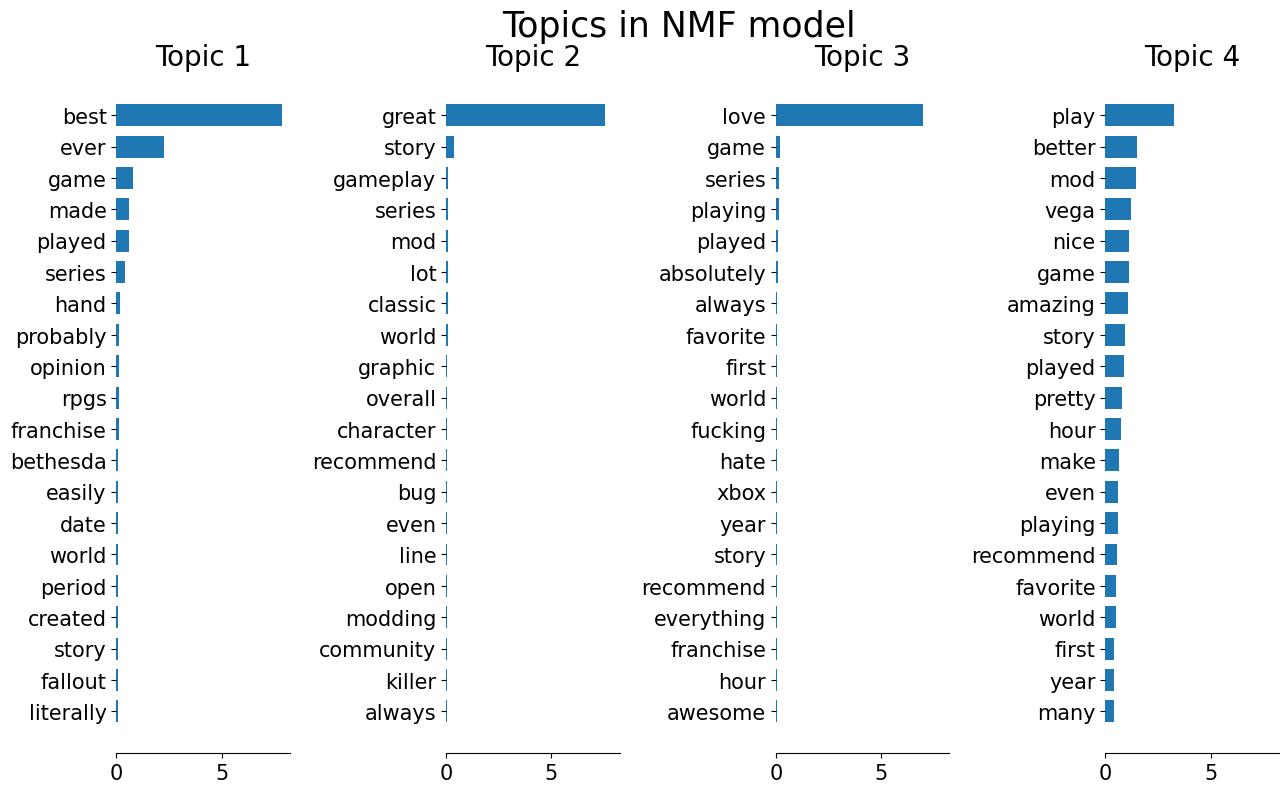

In [50]:
# visualization of the most relevant tokens

def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 4, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in NMF model")

## TSNE

In [51]:
topic_name_dict = {0: "best game", 1: "great gameplay", 2: "love game series", 3: "mods"}

In [12]:
tsne = TSNE(random_state=42, learning_rate=100)
tsne_trans = tsne.fit_transform(H)
tsne_trans = pd.DataFrame(tsne_trans, columns = ['TSNE1', 'TSNE2'])

In [52]:
# for each document takes the topic with highest weight and assigns document to this class -- hard clustering.
tsne_trans['class'] = np.argmax(H, axis = 1)
tsne_trans['class'] = tsne_trans['class'].replace(topic_name_dict)

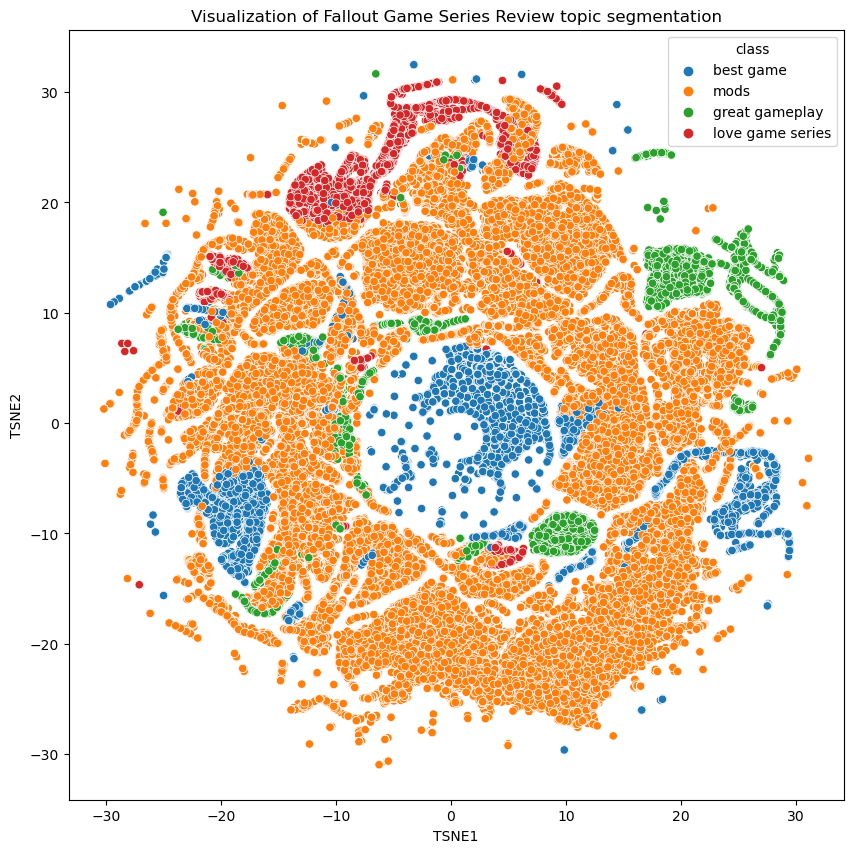

In [53]:
# tsne visualization 

plt.figure(figsize=(10,10))
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'class', data = tsne_trans, palette = 'tab10')
plt.title('Visualization of Fallout Game Series Review topic segmentation')
plt.show()

## Topic Modeling for Voted Down

In [54]:
# vectorizing voted down 

corpus = voted_down["joined_review_preprocessed"]
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus)
X_train

<21339x24950 sparse matrix of type '<class 'numpy.float64'>'
	with 467050 stored elements in Compressed Sparse Row format>

In [55]:
# number of unique tokens under voted down dataframe

len(vectorizer.get_feature_names())

24950

In [65]:
topic_model = NMF(n_components = 3)
topic_model.fit(X_train)

NMF(n_components=3)

In [66]:
# to get H (the weight of the fitted topics)
H = topic_model.transform(X_train) 

# to get W (importance of each token)
W = topic_model.components_ 

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (3, 24950)
Shape of H is (21339, 3)
Shape of X_train is (21339, 24950)


In [67]:
# tokens with highest weight

for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['steam', 'quest', 'many', 'year', 'start', 'cant', 'thing', 'story', 'bug', 'playing', 'played', 'shit', 'mod', 'better', 'want', 'money', 'make', 'every', 'game', 'hour', 'vega', 'bethesda', 'even', 'crash', 'play']


THE TOP 10 WORDS FOR TOPIC #1
['update', 'make', 'cant', 'refund', 'fix', 'download', 'patch', 'waste', 'need', 'optimized', 'computer', 'fucking', 'great', 'launch', 'anymore', 'tried', 'even', 'live', 'version', 'wont', 'dont', 'steam', 'doesnt', 'window', 'work']


THE TOP 10 WORDS FOR TOPIC #2
['terrible', 'played', 'hour', 'fucking', 'super', 'better', 'nothing', 'quickly', 'world', 'vega', 'empty', 'fast', 'feel', 'slow', 'hell', 'quest', 'repetitive', 'buggy', 'gameplay', 'pretty', 'story', 'kinda', 'shit', 'get', 'boring']




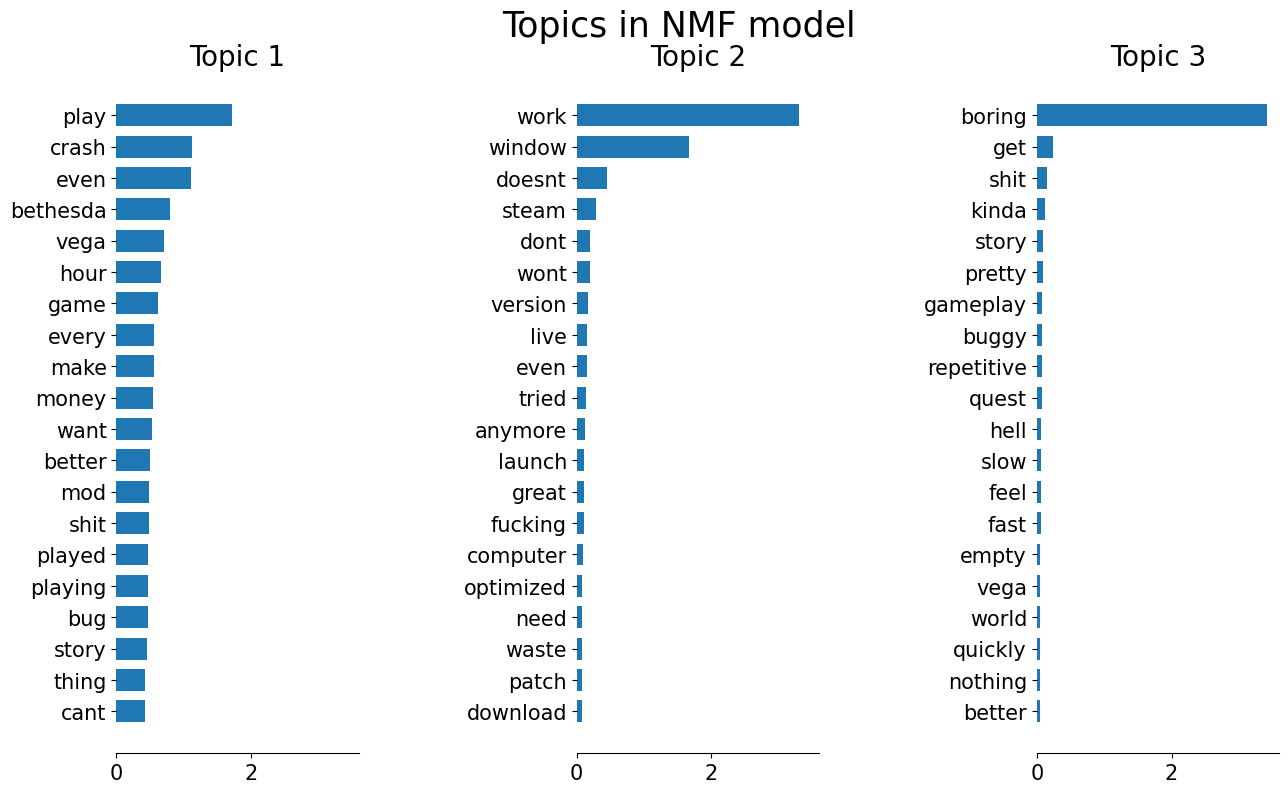

In [68]:
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in NMF model")

In [69]:
topic_name_dict = {0: "gameplay", 1: "operating system", 2: "storyline"}

In [70]:
tsne = TSNE(random_state=42, learning_rate=100)
tsne_trans = tsne.fit_transform(H)
tsne_trans = pd.DataFrame(tsne_trans, columns = ['TSNE1', 'TSNE2'])

In [71]:
# for each document takes the topic with highest weight and assigns document to this class -- hard clustering.
tsne_trans['class'] = np.argmax(H, axis = 1)
tsne_trans['class'] = tsne_trans['class'].replace(topic_name_dict)

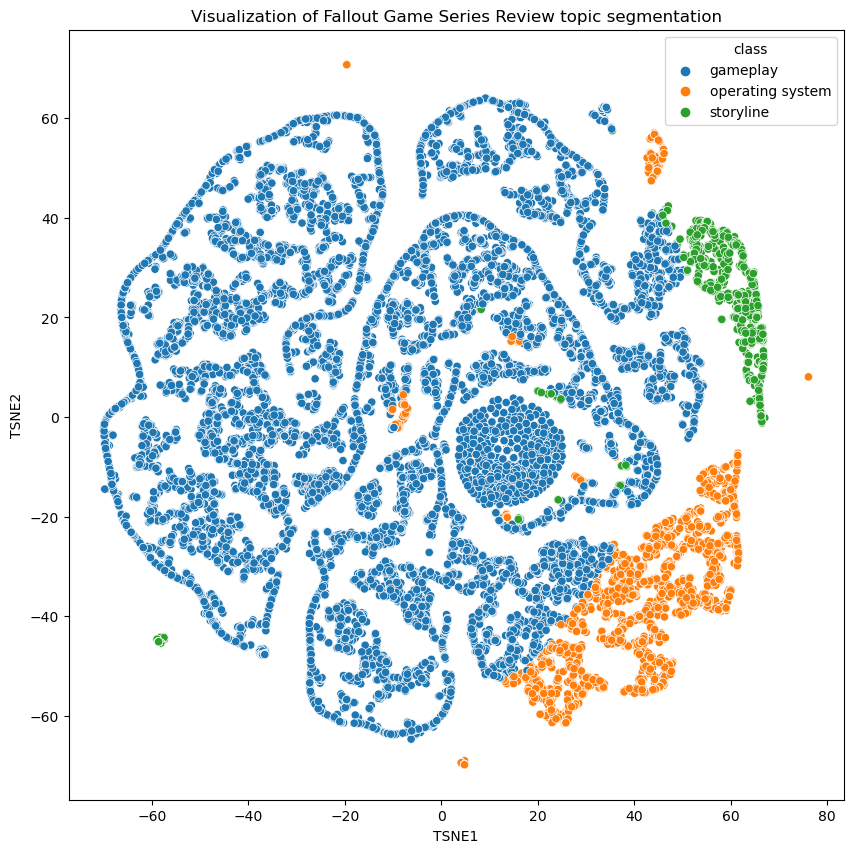

In [72]:
# tsne visualization 

plt.figure(figsize=(10,10))
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'class', data = tsne_trans, palette = 'tab10')
plt.title('Visualization of Fallout Game Series Review topic segmentation')
plt.show()